#### You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column

In [46]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bhp.csv')

df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [11]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

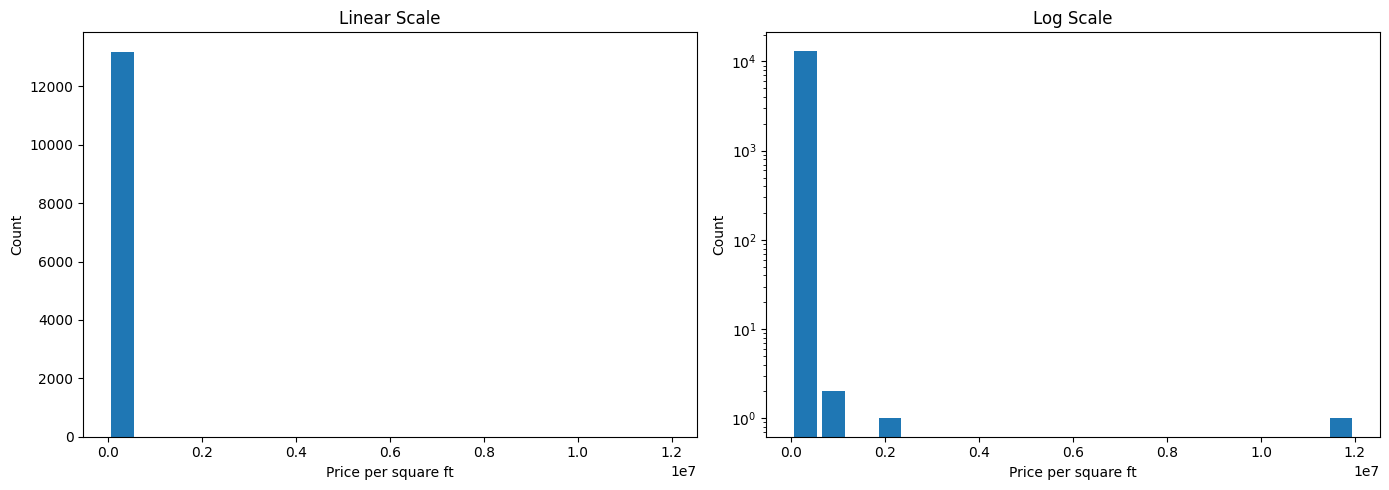

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df.price_per_sqft, bins=20, rwidth=0.8)
axes[0].set_xlabel('Price per square ft')
axes[0].set_ylabel('Count')
axes[0].set_title('Linear Scale')

axes[1].hist(df.price_per_sqft, bins=20, rwidth=0.8, log=True)
axes[1].set_xlabel('Price per square ft')
axes[1].set_ylabel('Count')
axes[1].set_title('Log Scale')

# Show the plots
plt.tight_layout()
plt.show()

### (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [15]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])

# Outliers
df[(df.price_per_sqft<min_threshold) | (df.price_per_sqft>max_threshold)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


### (2) After removing outliers in step 1, you get a new dataframe.

In [19]:
df2 = df[(df.price_per_sqft>min_threshold) & (df.price_per_sqft<max_threshold)]

df2.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9413,Munnekollal,10 Bedroom,1200.0,8.0,230.00,10,19166
9324,Frazer Town,2 BHK,1180.0,2.0,105.00,2,8898
7268,Uttarahalli,3 BHK,1215.0,2.0,52.85,3,4349
4485,Kalena Agrahara,2 BHK,1270.0,2.0,100.00,2,7874
8898,Old Madras Road,3 BHK,1350.0,3.0,45.90,3,3400


### (3) On step(2) dataframe, use 4 standard deviation to remove outliers

In [51]:
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()

min_limit, max_limit

(-9900.429065502582, 23227.73653589432)

In [53]:
# Outliers
df2[(df2.price_per_sqft<min_limit) | (df2.price_per_sqft>max_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [55]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]

df3.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12676,other,2 BHK,1210.0,2.0,60.00,2,4958
8163,Hegde Nagar,3 BHK,1847.0,3.0,123.00,3,6659
11580,Gunjur,2 BHK,1235.0,2.0,44.50,2,3603
5106,Mahadevpura,2 BHK,1058.0,2.0,85.00,2,8034
7580,8th Phase JP Nagar,2 BHK,1125.0,2.0,36.94,2,3283


### (4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

Text(0, 0.5, 'Count')

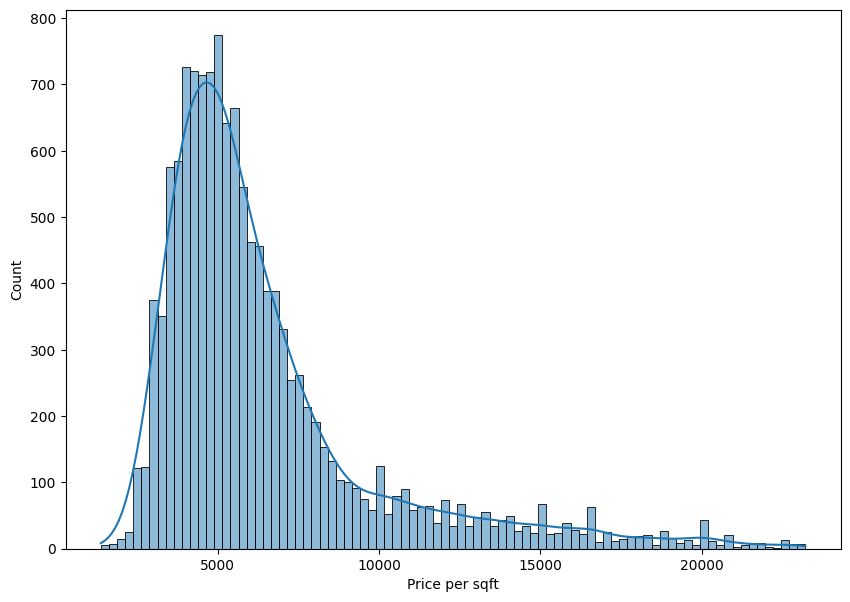

In [62]:
import seaborn as sns
sns.histplot(df3.price_per_sqft, kde=True)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [67]:
df3.price_per_sqft.min(), df3.price_per_sqft.mean(), df3.price_per_sqft.max()

(1379, 6449.328044761248, 23214)

### (5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

Formula:

z score = (datapoints - mean) / standard deviation

In [68]:
df2['z_score'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()

df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [69]:
# Outliers
df2[(df2.z_score<-4) | (df2.z_score>4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [70]:
df4 = df2[(df2.z_score>-4) & (df2.z_score<4)]

df4.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
6623,other,3 BHK,1602.0,2.0,170.0,3,10611,0.953230
5782,TC Palaya,8 Bedroom,1500.0,8.0,150.0,8,10000,0.805682
11945,Hoodi,5 Bedroom,3250.0,5.0,395.0,5,12153,1.325602
11623,Kogilu,7 Bedroom,2456.0,7.0,85.0,7,3460,-0.773639
6416,Banashankari Stage VI,2 BHK,1160.0,2.0,59.0,2,5086,-0.380982


In [78]:
df4.drop('z_score', axis='columns', inplace=True)

In [79]:
df3.shape

(13047, 7)

In [80]:
df4.shape

(13047, 7)

We got the exact same result as step 3. Hence, our implementation is correct~